# Bank marketing data analysis

The data I will be analyzing is related with direct marketing campaigns (phone calls) of a Portuguese banking institution, and the goal of this project is to build a model to predict whether a client is likely to subscribe to the bank term deposit or not. There are 20 attributes, and the outcome is binary ('yes' or 'no').
The data was obtained from UCI Machine Learning Repository, and more information is available at: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

***
## Data citation:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
***

# 1. Import data

In [1]:
from io import BytesIO
from zipfile import ZipFile
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

resp = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip').content
zipfile = ZipFile(BytesIO(resp))
zipfile.namelist()

['bank-additional/',
 'bank-additional/.DS_Store',
 '__MACOSX/',
 '__MACOSX/bank-additional/',
 '__MACOSX/bank-additional/._.DS_Store',
 'bank-additional/.Rhistory',
 'bank-additional/bank-additional-full.csv',
 'bank-additional/bank-additional-names.txt',
 'bank-additional/bank-additional.csv',
 '__MACOSX/._bank-additional']

In [2]:
original_data = pd.read_csv(zipfile.open('bank-additional/bank-additional-full.csv'), delimiter=';')

***
# 2. Data exploration

In [3]:
data = original_data.copy()
data.head() # Showing the first 5 entries of the data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There is an entry named 'unknown' in the second row default column. All the missing data might be entered as 'unknown' rather than NaN.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
data.isna().sum() # Checking for missing data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
data.replace('unknown', np.nan, inplace=True)

In [7]:
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Now, pandas recognizes missing data.

In [8]:
def attribute_info(series):
    if series.dtype == 'int64' or series.dtype == 'float64':
        dtype = 'numerical'
    else:
        dtype = 'categorical'
    num_null = series.isna().sum()
    null_percent = num_null / len(data) * 100
    if dtype == 'categorical':
        print(f'The data type of "{series.name}" is {dtype}. \n\
There are {series.nunique()} categories, and the unique values are: \n\
{series.unique()}. \nThere are {num_null} missing values and {round(null_percent, 2)}% \
of data is missing.')
    else:
        print(f'The data type of "{series.name}" is {dtype}. \n\
The mean value is {round(series.mean(), 2)}, median is {series.median()}, \
min is {series.min()}, and the max is {series.max()}. \nThere are {num_null} missing values \
and {round(null_percent, 2)}% of data is missing.')

**Age**

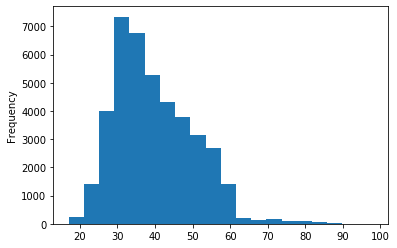

In [9]:
data.age.plot(kind='hist', bins=20)

In [10]:
attribute_info(data.age)

The data type of "age" is numerical. 
The mean value is 40.02, median is 38.0, min is 17, and the max is 98. 
There are 0 missing values and 0.0% of data is missing.


**Job**  
type of job

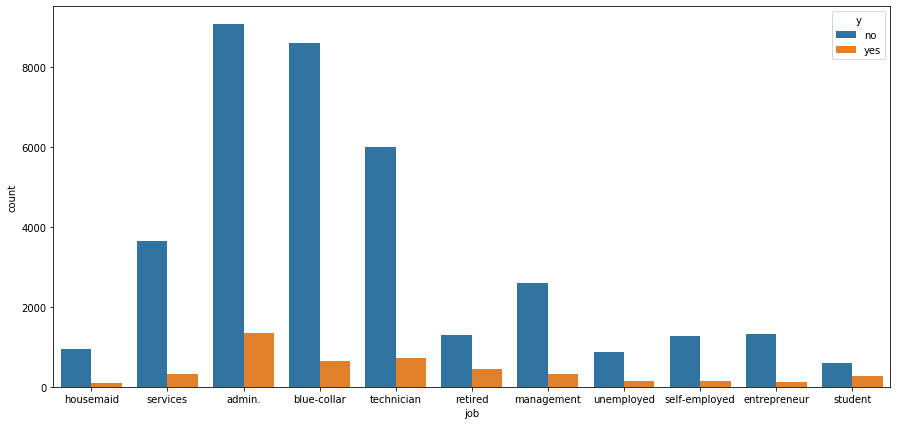

In [11]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.countplot(x='job', data=data, hue=data.y)

In [12]:
attribute_info(data.job)

The data type of "job" is categorical. 
There are 11 categories, and the unique values are: 
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' nan 'entrepreneur' 'student']. 
There are 330 missing values and 0.8% of data is missing.


**Marital**  
marital status

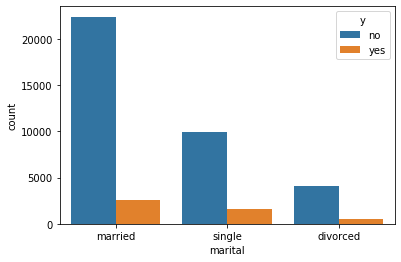

In [13]:
sns.countplot(x='marital', data=data, hue=data.y)

In [14]:
attribute_info(data.marital)

The data type of "marital" is categorical. 
There are 3 categories, and the unique values are: 
['married' 'single' 'divorced' nan]. 
There are 80 missing values and 0.19% of data is missing.


**Education**

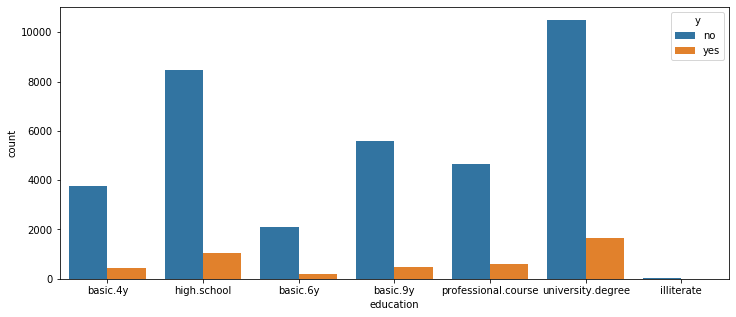

In [15]:
plt.figure(figsize=(12,5))
sns.countplot('education', data=data, hue=data.y)

In [16]:
attribute_info(data.education)

The data type of "education" is categorical. 
There are 7 categories, and the unique values are: 
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']. 
There are 1731 missing values and 4.2% of data is missing.


Ordinal encoding might be appropriate for education level when I preprocess the data since illiterate is closer to basic 4y than to university degree. Also, some categories can be combined into one (e.g. basic.4y, basic.6y, basic.9y to basic) and later validate the effectiveness through hyperparameter tuning.

**Default**  
has credit in default

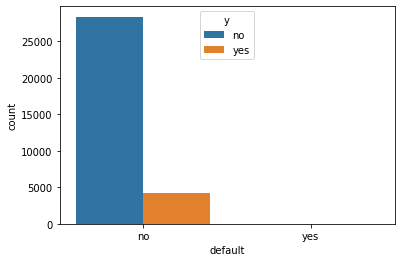

In [17]:
sns.countplot('default', data=data, hue=data.y)

In [18]:
attribute_info(data.default)

The data type of "default" is categorical. 
There are 2 categories, and the unique values are: 
['no' nan 'yes']. 
There are 8597 missing values and 20.87% of data is missing.


In [19]:
data.default.value_counts()

no     32588
yes        3
Name: default, dtype: int64

Here, about 20% of the data is missing, and there are only 3 people that have defaulted. It might be a good option to simply drop this attribute.

**Housing**  
has housing loan

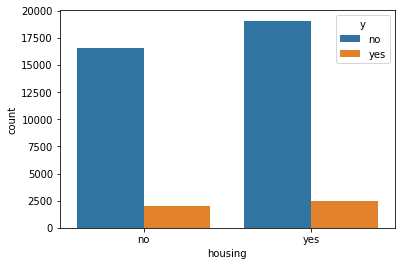

In [20]:
sns.countplot('housing', data=data, hue=data.y)

In [21]:
attribute_info(data.housing)

The data type of "housing" is categorical. 
There are 2 categories, and the unique values are: 
['no' 'yes' nan]. 
There are 990 missing values and 2.4% of data is missing.


**Loan**  
has personal loan

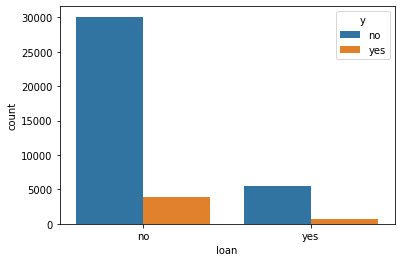

In [22]:
sns.countplot('loan', data=data, hue=data.y)

In [23]:
attribute_info(data.loan)

The data type of "loan" is categorical. 
There are 2 categories, and the unique values are: 
['no' 'yes' nan]. 
There are 990 missing values and 2.4% of data is missing.


**Contact**  
contact communication type

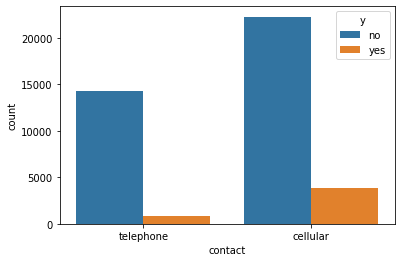

In [24]:
sns.countplot('contact', data=data, hue=data.y)

In [25]:
attribute_info(data.contact)

The data type of "contact" is categorical. 
There are 2 categories, and the unique values are: 
['telephone' 'cellular']. 
There are 0 missing values and 0.0% of data is missing.


**Month**  
last contact month of year

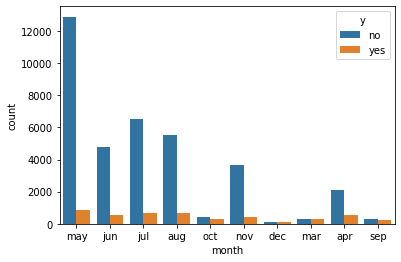

In [26]:
sns.countplot('month', data=data, hue=data.y)

In [27]:
attribute_info(data.month)

The data type of "month" is categorical. 
There are 10 categories, and the unique values are: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']. 
There are 0 missing values and 0.0% of data is missing.


**Day_of_week**  
last contact day of the week

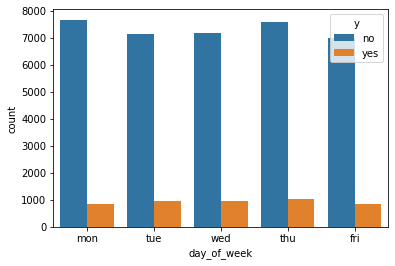

In [28]:
sns.countplot('day_of_week', data=data, hue=data.y)

In [29]:
attribute_info(data.day_of_week)

The data type of "day_of_week" is categorical. 
There are 5 categories, and the unique values are: 
['mon' 'tue' 'wed' 'thu' 'fri']. 
There are 0 missing values and 0.0% of data is missing.


**Duration**  
last contact duration, in seconds  

**Note: This data is last contact duration in seconds. This attribute is highly correlated to the target since duration of 0 means 'no'. Yet, this attribute is useless because duration is not known before a call is performed, and after the call, the target y is obviously known, so this attribute must be dropped.**

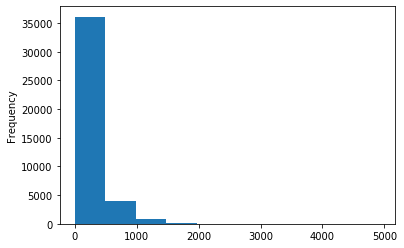

In [30]:
data.duration.plot(kind='hist', bins=10)

**Campaign**  
number of contacts performed during this campaign and for this client

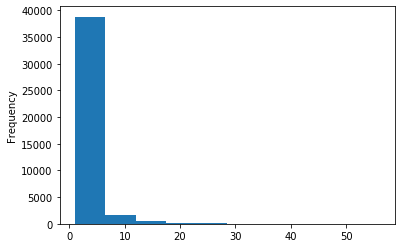

In [31]:
data.campaign.plot(kind='hist')

In [32]:
attribute_info(data.campaign)

The data type of "campaign" is numerical. 
The mean value is 2.57, median is 2.0, min is 1, and the max is 56. 
There are 0 missing values and 0.0% of data is missing.


**Pdays**  
number of days that passed by after the client was last contacted from a previous campaign. (999 means client was not previously contacted)  

Since most of values are 999, it might make sence to turn this feature into a binary category (0 for 999, 1 for others) or simply drop the feature.

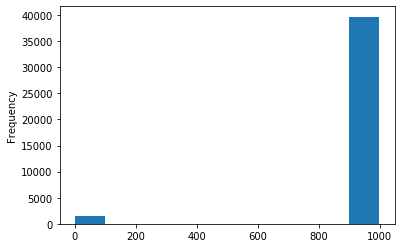

In [33]:
data.pdays.plot(kind='hist', bins=10)

**Distribution of pdays if 999 was ignored**

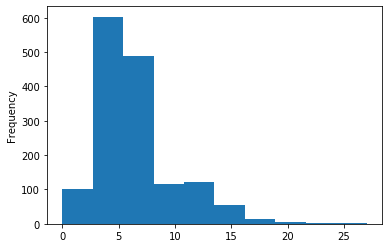

In [34]:
data.pdays.apply(lambda x: np.nan if x == 999 else x).plot(kind='hist', bins=10)

In [35]:
attribute_info(data.pdays)

The data type of "pdays" is numerical. 
The mean value is 962.48, median is 999.0, min is 0, and the max is 999. 
There are 0 missing values and 0.0% of data is missing.


In [36]:
data.pdays.value_counts().head()

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

**Previous**  
number of contacts performed before this campaign and for this client

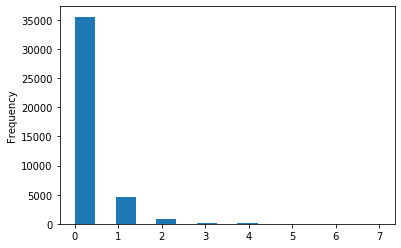

In [37]:
data.previous.plot(kind='hist', bins=15)

In [38]:
attribute_info(data.previous)

The data type of "previous" is numerical. 
The mean value is 0.17, median is 0.0, min is 0, and the max is 7. 
There are 0 missing values and 0.0% of data is missing.


**poutcome**  
outcome of the previous marketing campaign

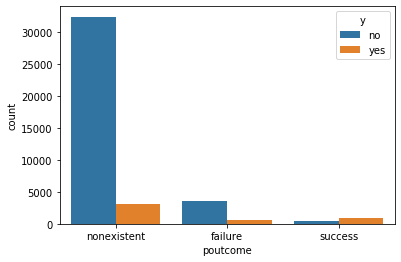

In [39]:
sns.countplot(data.poutcome, hue=data.y)

In [40]:
attribute_info(data.poutcome)

The data type of "poutcome" is categorical. 
There are 3 categories, and the unique values are: 
['nonexistent' 'failure' 'success']. 
There are 0 missing values and 0.0% of data is missing.


**emp.var.rate**  
employment variation rate - quarterly indicator

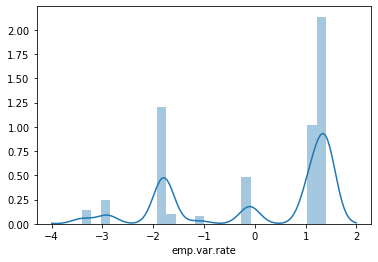

In [41]:
sns.distplot(data['emp.var.rate'])

In [42]:
attribute_info(data['emp.var.rate'])

The data type of "emp.var.rate" is numerical. 
The mean value is 0.08, median is 1.1, min is -3.4, and the max is 1.4. 
There are 0 missing values and 0.0% of data is missing.


**cons.price.idx**  
consumer price index - monthly indicator

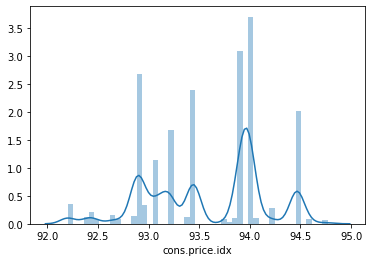

In [43]:
sns.distplot(data['cons.price.idx'])

In [44]:
attribute_info(data['cons.price.idx'])

The data type of "cons.price.idx" is numerical. 
The mean value is 93.58, median is 93.749, min is 92.20100000000001, and the max is 94.76700000000001. 
There are 0 missing values and 0.0% of data is missing.


**cons.conf.idx**  
consumer confidence index - monthly indicator

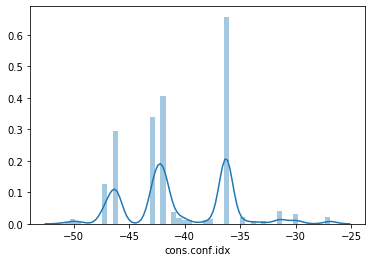

In [45]:
sns.distplot(data['cons.conf.idx'])

In [46]:
attribute_info(data['cons.conf.idx'])

The data type of "cons.conf.idx" is numerical. 
The mean value is -40.5, median is -41.8, min is -50.8, and the max is -26.9. 
There are 0 missing values and 0.0% of data is missing.


**euribor3m**  
euribor 3 month rate - daily indicator

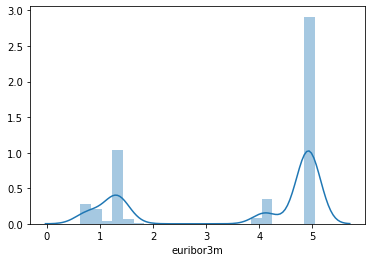

In [47]:
sns.distplot(data.euribor3m)

In [48]:
attribute_info(data.euribor3m)

The data type of "euribor3m" is numerical. 
The mean value is 3.62, median is 4.857, min is 0.634, and the max is 5.045. 
There are 0 missing values and 0.0% of data is missing.


**nr.employed**  
number of employees - quarterly indicator

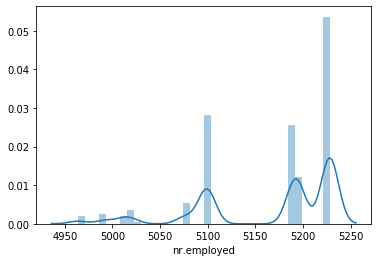

In [49]:
sns.distplot(data['nr.employed'])

In [50]:
attribute_info(data['nr.employed'])

The data type of "nr.employed" is numerical. 
The mean value is 5167.04, median is 5191.0, min is 4963.6, and the max is 5228.1. 
There are 0 missing values and 0.0% of data is missing.


**y**  
has the client subscribed a term deposit?

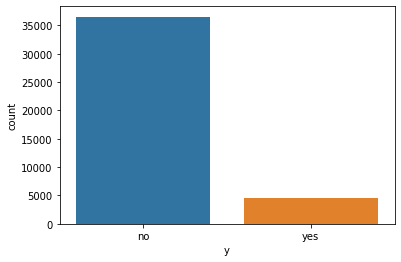

In [51]:
sns.countplot(data.y)

In [52]:
print('Percent of "no": ', round(data.y.value_counts().no / len(data) * 100, 2) , '%')
print('Percent of "yes": ', round(data.y.value_counts().yes / len(data) * 100, 2) , '%')

Percent of "no":  88.73 %
Percent of "yes":  11.27 %


**As you can see on the plot, there is a fairly big data imbalance on the target class. This means that I need to oversample from 'yes' class in order to avoid low recall score for 'yes' class. In other words, oversampling is required to avoid the model from predicting "no" most of the time. (A model that only predicts "no" would achieve about 88.73% accuracy, while such a model is useless.)**


In [53]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


***
## Split the data into train and test sets
Rather than splitting the data randomly, I will use StratifiedShuffleSplit to preserve the percentage of the y labels.  
I will split the 80% of the data into a train set and 20% into a test set.

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=10)
for train_index, test_index in split.split(original_data, original_data.y):
    strat_train_set = original_data.iloc[train_index]
    strat_test_set = original_data.iloc[test_index]
print('The proportion of train dataset where y = "yes" is:',
      round(len(strat_train_set[strat_train_set.y == 'yes']) / len(strat_train_set), 3))
print('The proportion of test dataset where y = "yes" is:',
      round(len(strat_test_set[strat_test_set.y == 'yes']) / len(strat_test_set), 3))

The proportion of train dataset where y = "yes" is: 0.113
The proportion of test dataset where y = "yes" is: 0.113


In [55]:
bank = strat_train_set.drop('y', axis=1)
bank_label = (strat_train_set.y == 'yes')

***
# 3. Preprocess the data
## Drop the duration column

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin

class DurationDropper(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        return self
    
    def transform(self, df):
        return df.drop('duration', axis=1)

In [57]:
X = bank.copy()
X = DurationDropper().fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6592,55,admin.,married,high.school,no,yes,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
10791,45,management,married,university.degree,no,yes,no,telephone,jun,tue,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
27187,54,technician,married,high.school,unknown,yes,no,cellular,nov,fri,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8
39753,38,admin.,single,basic.9y,no,no,no,cellular,may,thu,2,999,0,nonexistent,-1.8,93.876,-40.0,0.699,5008.7
29547,59,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,5,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,45,blue-collar,divorced,high.school,unknown,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
18238,36,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
14100,39,technician,divorced,university.degree,no,no,no,cellular,jul,mon,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
29797,41,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,3,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1


***
## Convert pdays into binary category or drop the feature

In [58]:
class PdaysConverter(BaseEstimator, TransformerMixin):
    def __init__(self, convert=True):
        if type(convert) != bool:
            raise ValueError('reduce parameter must be boolean.')
        self.convert = convert
        
    def fit(self, df, y=None):
        return self
    
    def transform(self, df):
        df1 = df.copy()
        if self.convert:
            df1['pdays_new'] = (df1.pdays != 999)
            return df1.drop('pdays', axis=1)
        else:
            return df1.drop('pdays', axis=1)

In [59]:
X = PdaysConverter().fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new
6592,55,admin.,married,high.school,no,yes,no,telephone,may,wed,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
10791,45,management,married,university.degree,no,yes,no,telephone,jun,tue,2,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,False
27187,54,technician,married,high.school,unknown,yes,no,cellular,nov,fri,2,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,False
39753,38,admin.,single,basic.9y,no,no,no,cellular,may,thu,2,0,nonexistent,-1.8,93.876,-40.0,0.699,5008.7,False
29547,59,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,5,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,45,blue-collar,divorced,high.school,unknown,yes,yes,cellular,jul,thu,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,False
18238,36,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,False
14100,39,technician,divorced,university.degree,no,no,no,cellular,jul,mon,2,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,False
29797,41,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,3,1,failure,-1.8,93.075,-47.1,1.405,5099.1,False


***
## Create an option to reduce categories for education feature
My hypothesis here is that basic.4y and basic.9y are a lot closer to basic.6y than any other 2 education levels that are next to each other. (i.e. education level of basic.4y and education level of basic.6ys are a lot more similar to each other than high school and professional course)

In [60]:
class EducationReducer(BaseEstimator, TransformerMixin):
    def __init__(self, reduce=False):
        if type(reduce) != bool:
            raise ValueError('reduce parameter must be boolean.')
        self.reduce = reduce
    def fit(self, df, y=None):
        return self
    
    def transform(self, df):
        if self.reduce:
            df1 = df.copy()
            df1.education = df1.education.apply(lambda x: 'basic' if x == 'basic.4y' or 
                                                x == 'basic.6y' or x == 'basic.9y' else x)
            return df1
        else:
            return df

In [61]:
X = EducationReducer(reduce=False).fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new
6592,55,admin.,married,high.school,no,yes,no,telephone,may,wed,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
10791,45,management,married,university.degree,no,yes,no,telephone,jun,tue,2,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,False
27187,54,technician,married,high.school,unknown,yes,no,cellular,nov,fri,2,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,False
39753,38,admin.,single,basic.9y,no,no,no,cellular,may,thu,2,0,nonexistent,-1.8,93.876,-40.0,0.699,5008.7,False
29547,59,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,5,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,45,blue-collar,divorced,high.school,unknown,yes,yes,cellular,jul,thu,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,False
18238,36,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,1,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,False
14100,39,technician,divorced,university.degree,no,no,no,cellular,jul,mon,2,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,False
29797,41,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,3,1,failure,-1.8,93.075,-47.1,1.405,5099.1,False


Setting the reduce parameter equal to True on EducationReducer will result in combining "basic.4y", "basic.6y", and "basic.9y" categories into a "basic" category.

***
## Scale numerical values

In [62]:
from sklearn.preprocessing import StandardScaler

class NumScaler(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        num_var = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']
        scaler = StandardScaler()
        scaler.fit(df[num_var])
        self.num_var = num_var
        self.scaler = scaler
        return self
    
    def transform(self, df):
        df1 = df.copy()
        df1.loc[:, self.num_var] = self.scaler.transform(df1[self.num_var])
        return df1

In [63]:
X = NumScaler().fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new
6592,1.436957,admin.,married,high.school,no,yes,no,telephone,may,wed,-0.207568,-0.349517,nonexistent,0.644147,0.715048,0.883143,0.708160,0.327989,False
10791,0.476604,management,married,university.degree,no,yes,no,telephone,jun,tue,-0.207568,-0.349517,nonexistent,0.835578,1.528313,-0.283315,0.768251,0.841615,False
27187,1.340922,technician,married,high.school,unknown,yes,no,cellular,nov,fri,-0.207568,-0.349517,nonexistent,-0.121574,-0.655933,-0.326517,0.225123,0.394442,False
39753,-0.195644,admin.,single,basic.9y,no,no,no,cellular,may,thu,-0.207568,-0.349517,nonexistent,-1.206346,0.511300,0.105504,-1.694314,-2.195842,False
29547,1.821099,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,0.866284,-0.349517,nonexistent,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,0.476604,blue-collar,divorced,high.school,unknown,yes,yes,cellular,jul,thu,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
18238,-0.387715,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
14100,-0.099609,technician,divorced,university.degree,no,no,no,cellular,jul,mon,-0.207568,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.768829,0.841615,False
29797,0.092462,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,0.150383,1.658954,failure,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False


***
## Handle missing values
For job and marital columns, the missing values only account for 0.8% and 0.19% respectively of the total instances, so I will impute them with the most frequent values.

In [64]:
from sklearn.impute import SimpleImputer

class JobMaritalImputer(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        cols = ['job', 'marital']
        imputer = SimpleImputer(strategy='most_frequent', missing_values='unknown')
        imputer.fit(df[cols])
        self.cols = cols
        self.imputer = imputer
        return self
    
    def transform(self, df):
        df1 = df.copy()
        df1.loc[:, self.cols] = self.imputer.transform(df1[self.cols])
        return df1

In [65]:
X = JobMaritalImputer().fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new
6592,1.436957,admin.,married,high.school,no,yes,no,telephone,may,wed,-0.207568,-0.349517,nonexistent,0.644147,0.715048,0.883143,0.708160,0.327989,False
10791,0.476604,management,married,university.degree,no,yes,no,telephone,jun,tue,-0.207568,-0.349517,nonexistent,0.835578,1.528313,-0.283315,0.768251,0.841615,False
27187,1.340922,technician,married,high.school,unknown,yes,no,cellular,nov,fri,-0.207568,-0.349517,nonexistent,-0.121574,-0.655933,-0.326517,0.225123,0.394442,False
39753,-0.195644,admin.,single,basic.9y,no,no,no,cellular,may,thu,-0.207568,-0.349517,nonexistent,-1.206346,0.511300,0.105504,-1.694314,-2.195842,False
29547,1.821099,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,0.866284,-0.349517,nonexistent,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,0.476604,blue-collar,divorced,high.school,unknown,yes,yes,cellular,jul,thu,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
18238,-0.387715,admin.,divorced,university.degree,unknown,yes,yes,cellular,jul,wed,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
14100,-0.099609,technician,divorced,university.degree,no,no,no,cellular,jul,mon,-0.207568,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.768829,0.841615,False
29797,0.092462,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,0.150383,1.658954,failure,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False


In [66]:
print(bank.marital.value_counts())
X.marital.value_counts()

married     19934
single       9249
divorced     3700
unknown        67
Name: marital, dtype: int64


married     20001
single       9249
divorced     3700
Name: marital, dtype: int64

For default column, I will make options to either drop, impute with 'no', or leave the unknown as its own category.

Default feature is missing about 20% of the data which is significantly higher than other features, so my hypothesis is that it is not missing at random, and the fact that the value is missing might convey some valuable information.

In [67]:
class DefaultTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='most_frequent'):
        if strategy != 'most_frequent' and strategy != 'drop' and strategy != 'leave':
            raise ValueError('strategy must be set to "most_frequent", "drop", or "leave"')
        self.strategy = strategy
    def fit(self, df, y=None):
        return self
    def transform(self, df):
        if self.strategy == 'most_frequent':
            df1 = df.copy()
            df1['default'] = df1.default.replace('unknown', 'no')
            return df1
        elif self.strategy == 'drop':
            return df.drop('default', axis=1)
        else:
            df1 = df.copy()
            df1['default'] = df1.default.replace('unknown', 'missing')
            return df1

In [68]:
X = DefaultTransformer().fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new
6592,1.436957,admin.,married,high.school,no,yes,no,telephone,may,wed,-0.207568,-0.349517,nonexistent,0.644147,0.715048,0.883143,0.708160,0.327989,False
10791,0.476604,management,married,university.degree,no,yes,no,telephone,jun,tue,-0.207568,-0.349517,nonexistent,0.835578,1.528313,-0.283315,0.768251,0.841615,False
27187,1.340922,technician,married,high.school,no,yes,no,cellular,nov,fri,-0.207568,-0.349517,nonexistent,-0.121574,-0.655933,-0.326517,0.225123,0.394442,False
39753,-0.195644,admin.,single,basic.9y,no,no,no,cellular,may,thu,-0.207568,-0.349517,nonexistent,-1.206346,0.511300,0.105504,-1.694314,-2.195842,False
29547,1.821099,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,0.866284,-0.349517,nonexistent,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,0.476604,blue-collar,divorced,high.school,no,yes,yes,cellular,jul,thu,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
18238,-0.387715,admin.,divorced,university.degree,no,yes,yes,cellular,jul,wed,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
14100,-0.099609,technician,divorced,university.degree,no,no,no,cellular,jul,mon,-0.207568,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.768829,0.841615,False
29797,0.092462,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,0.150383,1.658954,failure,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False


For missing values in education, housing, and loan features, I will either impute with most frequent or predict the class using a machine learning algorithm of K-Nearest Neighbor.

In [69]:
from sklearn.neighbors import KNeighborsClassifier

class EducationHousingLoanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='knn'):
        if strategy != 'most_frequent' and strategy != 'knn':
            raise ValueError('strategy must be set to "most_frequent" or "knn".')
        self.strategy = strategy
    def fit(self, df, y=None):
        if self.strategy == 'most_frequent':
            imputers = []
            df1 = df.copy()
            for item in ['education', 'housing', 'loan']:
                imputers.append(SimpleImputer(strategy='most_frequent').fit(\
                    df[item].replace('unknown', np.nan).ravel().reshape(-1, 1)))
            self.imputers = imputers
            return self
        df1 = df.copy().replace('unknown',np.nan)
        df_clean = df.copy().replace('unknown', np.nan)
        num_var = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']
        cat_var = [col for col in list(df1) if col not in num_var]
        ordinal_var = [col for col in cat_var if (df1[col].nunique() <=2)] + ['education']
        one_hot_var = [col for col in cat_var if col not in ordinal_var]
        knn_estimators = []
        code_maps = []
        code_maps_other = []
        one_hot_cat_maps = []
        for i, item in enumerate(['education', 'housing', 'loan']):
            c = df1[item].astype('category')
            d = dict(enumerate(c.cat.categories))
            d[-1] = np.nan
            code_maps.append(d)
            df1[item] = df_clean[item].astype('category').cat.codes
            filt = (df1[item] == -1)
            one_hot_var1 = [col for col in one_hot_var if col != item]
            dic = {}
            for col in one_hot_var1:
                dic[col] = list(df1[col].unique())
            one_hot_cat_maps.append(dic)
            df2 = pd.get_dummies(df1, prefix=one_hot_var1, columns=one_hot_var1)
            other_cols = [col for col in ordinal_var if col != item]
            code_maps_other_partial = []
            for col in other_cols:
                if col == 'education':
                    if df_clean.education.nunique() == 7:
                        mp = {np.nan: -1, 'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, \
                                            'basic.9y': 3, 'high.school': 4, \
                                            'professional.course': 5, 'university.degree': 6}
                        df2[col] = df_clean[col].replace(mp).astype('category')
                        mp_swap = {value: key for key, value in mp.items()}
                        di = {}
                        di[col] = mp_swap
                        code_maps_other_partial.append(di)
                    elif df_clean.education.nunique()  == 5:
                        mp = {np.nan: -1, 'illiterate': 0, 'basic': 1, 'high.school': 2, \
                                            'professional.course': 3, 'university.degree': 4}
                        df2[col] = df_clean[col].map(mp).astype('category')
                        mp_swap = {value: key for key, value in mp.items()}
                        di = {}
                        di[col] = mp_swap
                        code_maps_other_partial.append(di)
                else:
                    c2 = df_clean[col].astype('category')
                    d2 = dict(enumerate(c2.cat.categories))
                    d2[-1] = np.nan
                    di = {}
                    di[col] = d2
                    code_maps_other_partial.append(di)
                    df2[col] = df_clean[col].astype('category').cat.codes
            code_maps_other.append(code_maps_other_partial)
            df2_train_X = df2[~filt].drop(item, axis=1)
            df2_train_y = df2[~filt][item]
            df2_test_X = df2[filt].drop(item, axis=1)
            knn_clf = KNeighborsClassifier()
            knn_clf.fit(df2_train_X, df2_train_y)
            knn_estimators.append(knn_clf)
        self.num_var = num_var
        self.cat_var = cat_var
        self.ordinal_var = ordinal_var
        self.one_hot_var = one_hot_var
        self.code_maps = code_maps
        self.code_maps_other = code_maps_other
        self.knn_estimators = knn_estimators
        self.one_hot_cat_maps = one_hot_cat_maps
        return self
    
    def transform(self, df):
        df1 = df.copy().replace('unknown', np.nan)
        df_final = df.copy()
        if self.strategy == 'most_frequent':
            for i, item in enumerate(['education', 'housing', 'loan']):
                df1[item] = self.imputers[i].transform(df1[item].\
                                                       ravel().reshape(-1, 1))
            return df1
        for i, item in enumerate(['education', 'housing', 'loan']):
            df1 = df.copy().replace('unknown', np.nan)
            code_map = self.code_maps[i]
            code_map_swap = {value:key for key, value in code_map.items()}
            df1[item] = df1[item].map(code_map_swap).astype('category')
            one_hot_var1 = [col for col in self.one_hot_var if col != item]
            
            for col in one_hot_var1:
                df1[col] = pd.Categorical(df1[col], categories=self.one_hot_cat_maps[i][col])
                
            df2 = pd.get_dummies(df1, prefix=one_hot_var1, columns=one_hot_var1)
            other_cols = [col for col in self.ordinal_var if col != item]
            for idx, col in enumerate(other_cols):     
                code_map_other_swap = {value:key for key, value in \
                                       self.code_maps_other[i][idx][col].items()}
                df2[col] = df1[col].map(code_map_other_swap).astype('category')
            filt = (df1[item] == -1)
            df2_test_X = df2[filt].drop(item, axis=1)
            item_pred = self.knn_estimators[i].predict(df2_test_X)
            df_final.loc[filt, item] = item_pred
            df_final[item] = df_final[item].replace(code_map)
            
        return df_final

In [70]:
X = EducationHousingLoanImputer(strategy='knn').fit_transform(X)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new
6592,1.436957,admin.,married,high.school,no,yes,no,telephone,may,wed,-0.207568,-0.349517,nonexistent,0.644147,0.715048,0.883143,0.708160,0.327989,False
10791,0.476604,management,married,university.degree,no,yes,no,telephone,jun,tue,-0.207568,-0.349517,nonexistent,0.835578,1.528313,-0.283315,0.768251,0.841615,False
27187,1.340922,technician,married,high.school,no,yes,no,cellular,nov,fri,-0.207568,-0.349517,nonexistent,-0.121574,-0.655933,-0.326517,0.225123,0.394442,False
39753,-0.195644,admin.,single,basic.9y,no,no,no,cellular,may,thu,-0.207568,-0.349517,nonexistent,-1.206346,0.511300,0.105504,-1.694314,-2.195842,False
29547,1.821099,self-employed,married,professional.course,no,yes,no,cellular,apr,mon,0.866284,-0.349517,nonexistent,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13679,0.476604,blue-collar,divorced,high.school,no,yes,yes,cellular,jul,thu,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
18238,-0.387715,admin.,divorced,university.degree,no,yes,yes,cellular,jul,wed,-0.565519,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.769407,0.841615,False
14100,-0.099609,technician,divorced,university.degree,no,no,no,cellular,jul,mon,-0.207568,-0.349517,nonexistent,0.835578,0.583821,-0.477724,0.768829,0.841615,False
29797,0.092462,admin.,married,professional.course,no,yes,yes,cellular,apr,mon,0.150383,1.658954,failure,-1.206346,-0.871768,-1.428171,-1.286390,-0.944310,False


In [71]:
print(bank.education.value_counts())
X.education.value_counts()

university.degree      9674
high.school            7634
basic.9y               4837
professional.course    4189
basic.4y               3336
basic.6y               1860
unknown                1404
illiterate               16
Name: education, dtype: int64


university.degree      10293
high.school             7998
basic.9y                4965
professional.course     4292
basic.4y                3494
basic.6y                1892
illiterate                16
Name: education, dtype: int64

In [72]:
print(bank.housing.value_counts())
X.housing.value_counts()

yes        17210
no         14955
unknown      785
Name: housing, dtype: int64


yes    17631
no     15319
Name: housing, dtype: int64

In [73]:
print(bank.loan.value_counts())
X.loan.value_counts()

no         27140
yes         5025
unknown      785
Name: loan, dtype: int64


no     27904
yes     5046
Name: loan, dtype: int64

***
## Encode categorical values and return a numpy array

In [74]:
class CatEncoder(BaseEstimator, TransformerMixin):
    def fit(self, df, y=None):
        df1 = df.copy()
        num_var = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed']
        cat_var = [col for col in list(df1) if col not in num_var]
        ordinal_var = [col for col in cat_var if (df1[col].nunique() <=2)] + ['education']
        one_hot_var = [col for col in cat_var if col not in ordinal_var]
        one_hot_cat_maps = {}
        for col in one_hot_var:
            one_hot_cat_maps[col] = list(df1[col].unique())
        code_maps = {}      
        for col in ordinal_var:
            if col == 'education':
                if df1.education.nunique() == 7:
                    mp = {'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 
                          'high.school': 4, 'professional.course': 5, 'university.degree': 6}
                    code_maps[col] = mp
                elif df1.education.nunique()  == 5:
                    mp = {'illiterate': 0, 'basic': 1, 'high.school': 2, 
                          'professional.course': 3, 'university.degree': 4}
                    code_maps[col] = mp
            else:
                c = df1[col].astype('category')
                d = dict(enumerate(c.cat.categories))
                d1 = {value:key for key, value in d.items()}
                code_maps[col] = d1
        self.num_var = num_var
        self.cat_var = cat_var
        self.ordinal_var = ordinal_var
        self.one_hot_var = one_hot_var
        self.code_maps = code_maps
        self.one_hot_cat_maps = one_hot_cat_maps
        return self
    
    def transform(self, df):
        df1 = df.copy()
        for col in self.one_hot_var:
            df1[col] = pd.Categorical(df1[col], categories=self.one_hot_cat_maps[col])
        df_final = pd.get_dummies(df1, prefix=self.one_hot_var, columns=self.one_hot_var)
        for col in self.ordinal_var:     
            code_map = self.code_maps[col]
            df_final[col] = df1[col].replace(code_map).astype('category')
        features = list(df_final)
        self.features = features
        return df_final.to_numpy().astype('float64')

In [75]:
X = CatEncoder().fit_transform(X)
X

array([[ 1.43695734,  4.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.4766036 ,  6.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.34092197,  4.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.09960865,  6.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.0924621 ,  5.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.34806852,  3.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

***
## Combine the preprocessing steps using pipeline

In [77]:
from imblearn.pipeline import Pipeline

preprocessing_pipeline =Pipeline([
    ('drop_duration', DurationDropper()),
    ('convert_pdays', PdaysConverter()),
    ('reduce_education', EducationReducer()),
    ('scale_num', NumScaler()),
    ('impute_job_marital', JobMaritalImputer()),
    ('transform_default', DefaultTransformer()),
    ('impute_education_housing_loan', EducationHousingLoanImputer()),
    ('encoder', CatEncoder())
])
bank_prepared = preprocessing_pipeline.fit_transform(bank)
bank_prepared

array([[ 1.43695734,  4.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.4766036 ,  6.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.34092197,  4.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.09960865,  6.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.0924621 ,  5.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.34806852,  3.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

Verifying that the pipeline produces the same result as applying each step manually.

In [78]:
np.allclose(X, bank_prepared)

True

***
## Performance metrics - F1 score

As I have mentioned, accuracy is not an appropriate performance metrics in this perticular case because the target class is imbalanced, and a model that predicts `no` would achive 88% accuracy rate.
Rather, I believe precision and recall scores on the `yes` class are appropriete, given that the business objective of the bank is to identify people that potentially subscribes to their term deposit. 

Precision is a ratio that is calculated by number of correct predictions that belong to a certain class divided by all the predictions for the class. In this case, the precision on the positive class translates to the success rate of marketing calls if the bank direct the calls to people who were classfied by a model that they would subscribe to the term deposit. In other words, higher the precision, better the marketing expense-to-value ratio.

If the bank only wants to achieve high precision, the easiest way is to make a call to one person that certainly would subscribe, and get the 100% precision. Obviously, that is not the goal, so they also have to take recall into account.

Recall is a ratio that is calculated by number of correct predictions that belong to a certain class divided by all the instances that belongs to the class. In this case, recall measures what percentage of people are reached out of all the people who would subscribe to the term deposit if they receive a marketing call. In the bank increased the number of marketing calls, recall score will go up while precision will go down, so there is generally a trade-off between those two metrics.

Because I believe both metrics are extremely important for the business goal, I chose F1 score to be an evaluation metrics for my model. F1 score is a harmonic mean of recall and precision (2 * (precision * recall) / (precision + recall) ), so the score will be lower than the average of precision and recall when the two values are not equal.

***
## Oversample with SMOTE, and model selection
I am using a pipeline from imblearn rather than from sklearn because it handles oversampling correctly. (i.e. It will not oversample the validation sets.)


In [79]:
X_prepared = bank_prepared
y_prepared = bank_label.ravel()

In [80]:
def f1(scores):
    print(f'The average f1 score across k = {len(scores)} folds cross validation is {round(scores.mean(),5)}.')

**Trying out logistic regression model**

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = Pipeline([
    ('os', SMOTE(random_state=10)),
    ('log_reg', LogisticRegression(random_state=10, max_iter=4000))
])
log_reg.fit(X_prepared, y_prepared)
lr_scores = cross_val_score(log_reg, X_prepared, y_prepared, scoring='f1', cv=5)
f1(lr_scores)

The average f1 score across k = 5 folds cross validation is 0.44478.


**Decision tree classifier**

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = rf_clf = Pipeline([
    ('os', SMOTE(random_state=10)),
    ('tree_clf', DecisionTreeClassifier(random_state=10))
])
tree_clf.fit(X_prepared, y_prepared)
tree_scores = cross_val_score(rf_clf, X_prepared, y_prepared, scoring='f1', cv=5)
f1(tree_scores)

The average f1 score across k = 5 folds cross validation is 0.33603.


**Random forest classifier**

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ('os', SMOTE(random_state=10)),
    ('rf_clf', RandomForestClassifier(random_state=10))
])
rf_clf.fit(X_prepared, y_prepared)
rf_scores = cross_val_score(rf_clf, X_prepared, y_prepared, scoring='f1', cv=5)
f1(rf_scores)

The average f1 score across k = 5 folds cross validation is 0.40878.


**Support vector machine classifier**

In [85]:
from sklearn.svm import SVC

svm_clf = Pipeline([
    ('os', SMOTE(random_state=10)),
    ('svm_clf', SVC(random_state=10))
], verbose=True)
svm_clf.fit(X_prepared, y_prepared)
svc_scores = cross_val_score(svm_clf, X_prepared, y_prepared, scoring='f1', cv=5, verbose=1)
f1(svc_scores)

[Pipeline] ................ (step 1 of 2) Processing os, total=   0.7s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total= 4.2min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Pipeline] ................ (step 1 of 2) Processing os, total=   0.4s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total= 2.5min
[Pipeline] ................ (step 1 of 2) Processing os, total=   0.4s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total= 2.5min
[Pipeline] ................ (step 1 of 2) Processing os, total=   0.4s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total= 2.4min
[Pipeline] ................ (step 1 of 2) Processing os, total=   0.4s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total= 2.5min
[Pipeline] ................ (step 1 of 2) Processing os, total=   0.4s
[Pipeline] ........... (step 2 of 2) Processing svm_clf, total= 2.4min
The average f1 score across k = 5 folds cross validation is 0.47691.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.2min finished


**K-nearest neighbors classifier**

In [86]:
np.sqrt(len(X_prepared))# In general, square root of the training set is a good number to set for n_neighbors in knn

181.52134860671347

In [87]:
from sklearn.neighbors import KNeighborsClassifier 
knn_clf = Pipeline([
    ('os', SMOTE(random_state=10)),
    ('knn_clf', KNeighborsClassifier(n_neighbors=180))
])
knn_clf.fit(X_prepared, y_prepared)
knn_scores = cross_val_score(knn_clf, X_prepared, y_prepared, scoring='f1', cv=5)
f1(knn_scores)

The average f1 score across k = 5 folds cross validation is 0.38305.


**Gaussian naive bayes classifier**

In [88]:
from sklearn.naive_bayes import GaussianNB

gaus_nb = Pipeline([
    ('os', SMOTE(random_state=10)),
    ('gaus_nb', GaussianNB())
])
gaus_nb.fit(X_prepared, y_prepared)
gaus_nb_scores =cross_val_score(gaus_nb, X_prepared, y_prepared, scoring='f1', cv=5)
f1(gaus_nb_scores)

The average f1 score across k = 5 folds cross validation is 0.3827.


Based on cross validation scores, logistic regression seems to produce best results, so I pick logistic regression for the final classifier.

***
## Hyperparameter Tuning
I will tune the hyperparameters that I created (e.g. reduce education categories or not, etc.), and the ones for logistic regression regularization.

In [89]:
no_hparam_pipe = Pipeline([
    ('drop_duration', DurationDropper()),
    ('scale_num', NumScaler()),
    ('impute_job_marital', JobMaritalImputer()),
])
X_grid = no_hparam_pipe.fit_transform(bank)
y_grid = bank_label.ravel()

## ---WARNING---
Running the following cell may take hours depending on your environment

In [90]:
%%time
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rand_gs_pipe = Pipeline([
    ('convert_pdays', PdaysConverter()),
    ('reduce_education', EducationReducer()),
    ('transform_default', DefaultTransformer()),
    ('imp_edu_hous_loan', EducationHousingLoanImputer()),
    ('encoder', CatEncoder()),
    ('os', SMOTE(random_state=10)),
    ('log_reg', LogisticRegression(random_state=10))
])

grid_params = {
    'convert_pdays__convert': [True, False],
    'reduce_education__reduce': [True, False],
    'transform_default__strategy': ['most_frequent', 'drop', 'leave'],
    'imp_edu_hous_loan__strategy': ['most_frequent', 'knn'],
    'log_reg__C': stats.randint(1, 1000),
    'log_reg__solver': ['saga'],
    'log_reg__penalty': ['elasticnet'],
    'log_reg__l1_ratio': stats.uniform(),
    'log_reg__max_iter': [4000]
}

rnd_gs = RandomizedSearchCV(rand_gs_pipe, grid_params, scoring='f1',
                            verbose=3, cv=5, n_iter=50)
rnd_gs.fit(X_grid, y_grid)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent, score=0.438, total= 3.3min
[CV] convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.3min remaining:    0.0s


[CV]  convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent, score=0.438, total= 2.9min
[CV] convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.2min remaining:    0.0s


[CV]  convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent, score=0.440, total= 3.2min
[CV] convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent 
[CV]  convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1_ratio=0.5963493602067385, log_reg__max_iter=4000, log_reg__penalty=elasticnet, log_reg__solver=saga, reduce_education__reduce=True, transform_default__strategy=most_frequent, score=0.464, total= 3.0min
[CV] convert_pdays__convert=True, imp_edu_hous_loan__strategy=most_frequent, log_reg__C=308, log_reg__l1

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 534.7min finished


CPU times: user 8h 45min 48s, sys: 3min 5s, total: 8h 48min 54s
Wall time: 8h 54min 55s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('convert_pdays',
                                              PdaysConverter(convert=True)),
                                             ('reduce_education',
                                              EducationReducer(reduce=False)),
                                             ('transform_default',
                                              DefaultTransformer(strategy='most_frequent')),
                                             ('imp_edu_hous_loan',
                                              EducationHousingLoanImputer(strategy='knn')),
                                             ('encoder', CatEncoder()),
                                             ('os',
                                              SMOTE(k_n...
                                        'log_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x16

In [91]:
gs_results = pd.DataFrame(rnd_gs.cv_results_)

In [92]:
gs_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_convert_pdays__convert', 'param_imp_edu_hous_loan__strategy',
       'param_log_reg__C', 'param_log_reg__l1_ratio',
       'param_log_reg__max_iter', 'param_log_reg__penalty',
       'param_log_reg__solver', 'param_reduce_education__reduce',
       'param_transform_default__strategy', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

Organizing the grid search results and converting into a pandas dataframe

In [93]:
gs_results_organized = gs_results[['rank_test_score', 'mean_test_score', 'std_test_score', 
                                   'param_convert_pdays__convert', 
                                   'param_reduce_education__reduce',
                                   'param_transform_default__strategy',
                                   'param_imp_edu_hous_loan__strategy',
                                   'param_log_reg__C', 'param_log_reg__l1_ratio'
                                 ]].sort_values(by='rank_test_score')
gs_results_organized.columns= ['rank', 'mean_score', 'std_score', 'convert_pdays', 
                               'reduce_education', 'transform_default', 'imp_edu_hous_loan',
                               'log__reg_C', 'log_reg__l1_ratio']
gs_results_organized

,rank,mean_score,std_score,convert_pdays,reduce_education,transform_default,imp_edu_hous_loan,log__reg_C,log_reg__l1_ratio
33,1,0.445915,0.010361,True,True,drop,knn,977,0.494852
32,1,0.445915,0.010361,True,True,drop,knn,454,0.596531
12,1,0.445915,0.010361,True,True,drop,knn,218,0.0629123
31,4,0.445874,0.010392,True,True,most_frequent,knn,304,0.366512
8,4,0.445874,0.010392,True,True,most_frequent,knn,601,0.468131
9,4,0.445874,0.010392,True,True,most_frequent,knn,394,0.0682382
49,7,0.445292,0.009319,False,True,drop,most_frequent,708,0.713213
1,8,0.445224,0.009931,True,True,most_frequent,most_frequent,36,0.278614
27,9,0.445223,0.009907,True,True,drop,most_frequent,250,0.532369
48,9,0.445223,0.009907,True,True,drop,most_frequent,266,0.998617


## Grid search results evaluation
From the randomized grid search cross validation results, converting pdays into a binary feature and reducing the categories of the education seem to produce better results. 

For the default feature, treating missing values as its own category leads to worse results. Options between imputing the missing values of default with a most_frequent value and dropping the feature does not seem to affect the performance much, and this is understandable because there were only 3 cases of 'yes' category in the feature which does not provide much information.

For the imputation methods of education, housing, and loan features, knn seems preferable to another option when convert_pdays and reduce_education hyperparameters are both set to True.

Looking at the top 3 estimators which produced a same score, regularization hyperparameters C and l1_ratio of logistic regression does not seem to affect the performance much when they are in the ranges (218, 977), (0.063, 0.495) respectively.

In [94]:
best_estimator = rnd_gs.best_estimator_
final_model = Pipeline(no_hparam_pipe.steps + best_estimator.steps)
final_model.fit(bank, bank_label)

Pipeline(memory=None,
         steps=[('drop_duration', DurationDropper()),
                ('scale_num', NumScaler()),
                ('impute_job_marital', JobMaritalImputer()),
                ('convert_pdays', PdaysConverter(convert=True)),
                ('reduce_education', EducationReducer(reduce=True)),
                ('transform_default', DefaultTransformer(strategy='drop')),
                ('imp_edu_hous_loan',
                 EducationHousingLoanImputer(strategy='kn...
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=10,
                       sampling_strategy='auto')),
                ('log_reg',
                 LogisticRegression(C=218, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=0.0629123176884826, max_iter=4000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='elasticnet', rando

***
## Testing the final model

In [95]:
from sklearn.metrics import confusion_matrix, classification_report

X_test = strat_test_set.drop('y', axis=1)
y_test = (strat_test_set.y == 'yes').to_numpy()
y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6163 1147]
 [ 346  582]]
              precision    recall  f1-score   support

       False       0.95      0.84      0.89      7310
        True       0.34      0.63      0.44       928

    accuracy                           0.82      8238
   macro avg       0.64      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238



## ROC curve
ROC curve is plotted with true positive rate against false positive rate at various thresholds setting of a classifier. The area under the curve (AUC) of ROC tells how much model is capable of distinguishing between classes. A model with roc auc score of 1.0 can classify instances perfectly, and a model with roc auc score of 0.5 has no classification capability.

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = final_model.predict_proba(X_test)
no_skill_proba = [0 for i in range(len(y_test))]

The roc auc score for the model is 0.789.


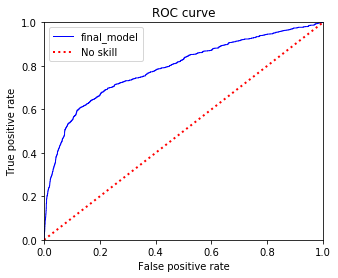

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
ns_fpr, ns_tpr, thresholds = roc_curve(y_test, no_skill_proba)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, 'b-', linewidth=1, label='final_model')
plt.plot(ns_fpr, ns_tpr, 'r:', linewidth=2, label='No skill')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.gca().axis([0, 1, 0, 1])
print(f'The roc auc score for the model is {round(roc_auc_score(y_test, y_proba[:, 1]), 3)}.')

***
## Feature importances

In [98]:
from eli5 import explain_weights
from eli5.formatters import format_html_styles

explain_weights(best_estimator['log_reg'], feature_names=best_estimator['encoder'].features)

Weight?,Feature
+1.489,cons.price.idx
+1.482,month_mar
+1.303,pdays_new
+0.834,nr.employed
+0.519,month_dec
+0.415,month_aug
+0.414,poutcome_success
+0.369,job_retired
+0.295,euribor3m
+0.278,job_student


The weights shows how much each features were influencial to come up with the final prediction for the model. Positive values contributes to the prediction of the positive class, and negative values contributes to the negative class.

***
## Summary
The precision of 'yes' class was 0.34, meaning 34% of the people that the model predicted who subscribed actually subscribed. In this case, if the bank makes calls to people who this model predicts they will subscribe, the bank is likely to achieve 34% conversion rate. This is significantly better than the original conversion rate of 11%. 

The recall of this model was 0.63, which means if the bank were to call all the people who this model predicts they will subscribe, they are likely to reach 63% of potential customers.

For the feature importances, employment variation rate, consumer price index and number of employed seem to affect the outcome a lot, and they are all macro factors that shows the economic conditions at the time. It shows that the bank's marketing campaign went well when the whole economy is performing well, and I think it is relatively straight forward to understand.

The model tells that pday_new is also a strong predictor that success rate is higher when they have contacted them before. This again, is relatively easy to comprehend and we don't need to have this machine learning model to know that more exposure is better.

What I found interesting is that the model thinks month of June and month of March are the strong predictors. One hypothesis is that there are seasonal factors that affects people's decision to subscribe to term deposit during March and June. I don't know enough about the culture of Portugal (where the data came from) to conclude whether there are connections to the factors that influence the outcome in these two months, but it is worth investigating.
Second hypothesis is that there were difference in the marketing method or procedure. For example, the training level of caller, or target segment to call. Alternatively, higher weights for month of March could just be a coincidence because the number of instances that belongs to the class is only 546 in the whole data out of 41188 instances, but it does not explain the importance of June because it has 4101 instances.

Additionally, contact feature has high negative weight which means clients using cell phone at the time of marketing calls have higher probability of subscribing than clients using landline telephone. 

Regardless of what the hypotheses are, the bank should further investigate whether there are meaningful causation in order to spot the success factor of the marketing campaign.